# Credit Commitments Compliance Evaluation

## Business case

Credit One is a credit risk rating company, its '**business partners**' use their services to identify possible risks in the profile of one of their clients prior to granting a loan.
Recently, Credit One has seen an increase in the number of customers who have defaulted on loans granted by their business partners, and Credit One as a credit rating could risk losing business if the problem is not resolved correctly.

## Objective

Credit One **has the primary need to identify and weigh the relevant attributes** that allow it to classify, with a better criterion, the clients that will fulfill their credit commitments.

## Scope

Achieve a `satisfactory classification`, using Machine Learning tools; of **those clients that will fulfill their credit commitments with a minimum acceptance criterion greater than 85%, thus reaching the ratings of 'will meet' (> = 85%) or 'will not meet' (<85%)**.

### 1. Setup work environment
     a) Load libraries
     b) Load dataset
     

<font color='red'>**Note**.</font> The type of currency for Credit Amount and other currency attributes, such as: 'Pay', 'BillAMT' and 'PayAMT', have been expressed in **new taiwanese dollar**, for this work we will abbreviate it to '**dollar**' in `lower case`.

     
Dataset Source:[ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

%matplotlib inline

set_option('display.width', 100)
set_option('precision', 3)

# set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [31]:
# Load dataset
url = '.\data\CreditOne-CCC.csv'
names = ['Id', 'TotalLoan', 'Gender', 'Education', 'MaritalStatus', 'Age', 
         'HstPaySep15', 'HstPayAug15', 'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 
         'BillSep15', 'BillAug15', 'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 
         'PaySep15', 'PayAug15', 'PayJul15', 'PayJun15', 'PayMay15', 'PayApr15', 
         'DefaultPayment']

df = pd.read_csv(url, sep=",", names=names)

print('Rows and columns count:', df.shape)

Rows and columns count: (30000, 25)


In [32]:
print('Columns names:', df.columns)

Columns names: Index(['Id', 'TotalLoan', 'Gender', 'Education', 'MaritalStatus', 'Age', 'HstPaySep15',
       'HstPayAug15', 'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 'BillSep15',
       'BillAug15', 'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 'PaySep15', 'PayAug15',
       'PayJul15', 'PayJun15', 'PayMay15', 'PayApr15', 'DefaultPayment'],
      dtype='object')


### 2. Descriptive Stats and Visualization
    a) Descriptive statistics
    b) Data visualizations
    
##### Descriptive statistics    

In [10]:
# Descriptive statistics

# Exploring A Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Id                30000 non-null int64
TotalLoan         30000 non-null int64
Gender            30000 non-null int64
Education         30000 non-null int64
MaritalStatus     30000 non-null int64
Age               30000 non-null int64
Pay1              30000 non-null int64
Pay2              30000 non-null int64
Pay3              30000 non-null int64
Pay4              30000 non-null int64
Pay5              30000 non-null int64
Pay6              30000 non-null int64
BillAMT1          30000 non-null int64
BillAMT2          30000 non-null int64
BillAMT3          30000 non-null int64
BillAMT4          30000 non-null int64
BillAMT5          30000 non-null int64
BillAMT6          30000 non-null int64
PayAMT1           30000 non-null int64
PayAMT2           30000 non-null int64
PayAMT3           30000 non-null int64
PayAMT4           30000 non-null int64
PayAMT5           30000 non-null 

It can be noted that there are 30K observations (`rows`) and 25 attributes (`columns`). Preliminary all are of type 'int64' and has no missing values in any of its attributes.

In [11]:
# chenck the firsts rows
dfcf = df.iloc[:,1:]
dfcf.head(5)

,TotalLoan,Gender,Education,MaritalStatus,Age,Pay1,Pay2,Pay3,Pay4,Pay5,...,BillAMT4,BillAMT5,BillAMT6,PayAMT1,PayAMT2,PayAMT3,PayAMT4,PayAMT5,PayAMT6,DefaultPayment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Some of the attributes should be converted into classifications, such as: **Gender**, **Education**, **MaritalStatus** and **DefaultPayment**.

The 'Age' attribute could facilitate the analysis by '**age group**', which would facilitate the study by large classifications, such as: `Youth Z` (0-35), `Youth Y` (36-53), `Adulthood` (54-71) and `Major` (72 - more).

In [12]:
# Attribute features
dfft = df.iloc[:,1:]
dfft.describe()

,TotalLoan,Gender,Education,MaritalStatus,Age,Pay1,Pay2,Pay3,Pay4,Pay5,...,BillAMT4,BillAMT5,BillAMT6,PayAMT1,PayAMT2,PayAMT3,PayAMT4,PayAMT5,PayAMT6,DefaultPayment
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,30000.000
mean,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,...,43262.949,40311.401,38871.760,5663.581,5.921e+03,5225.681,4826.077,4799.388,5215.503,0.221
std,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,...,64332.856,60797.156,59554.108,16563.280,2.304e+04,17606.961,15666.160,15278.306,17777.466,0.415
min,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,8.330e+02,390.000,296.000,252.500,117.750,0.000
50%,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2.009e+03,1800.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5.000e+03,4505.000,4013.250,4031.500,4000.000,0.000
max,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1.684e+06,896040.000,621000.000,426529.000,528666.000,1.000


The range of the values in loan extends from 10 thousand to one million with an average of 14 thousand dollars.

The data for: Gender, Education and MaritalStatus, require a detailed review. The attributes have values that do not correspond to the classifications previously described [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

The values for the BillAMT and PayAMT groups must be analyzed, they present negative values and values with very wide ranges that may not be correlated with the loan amount.

In [13]:
# Review Class Distribution

# (Yes = 1, No = 0)
DefaultPayment_counts = df.groupby('DefaultPayment').size()
print(DefaultPayment_counts)

DefaultPayment
0    23364
1     6636
dtype: int64


In [14]:
dfcnt = df.DefaultPayment.count()
dfpNO = DefaultPayment_counts[0]
dfpYES = DefaultPayment_counts[1]
dfpNPC = round((dfpNO/dfcnt)*100, 2)
dfpYPC = round((dfpYES/dfcnt)*100, 2)

print('The dataset has {} observations, which {} ({}%) \'are overdue\'; while ' +
      '{} ({}%) correspond to credits that are up to date with their credit ' + 
      'obligations.'.format(dfcnt, dfpNO, dfpNPC, dfpYES, dfpYPC))

The dataset has {} observations, which {} ({}%) 'are overdue'; while {} ({}%) correspond to credits that are up to date with their credit obligations.


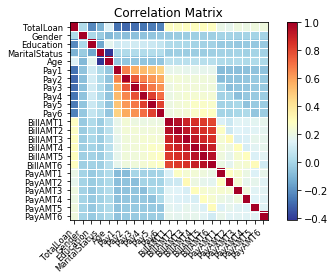

In [15]:
# Correlations between attributes

# Pairwise Pearson correlations
dfpp = df.iloc[:,1:]
corr = dfpp.set_index('DefaultPayment').corr(method='pearson')
# print(corr)

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

We can observe a strong correlation between 'BillAMT (n)' and 'DefaultPayment', in the same way an average correlation with respect to 'Pay (n)' and 'DefaultPayment'. This indicates the need to review '**collinearity**' between variables.
These factors must be evaluated during data cleaning.

**Note**. See 'data visualizations' below for better detail.

In [16]:
#  Skew of univariate distributions
dfkw = df.iloc[:,1:]
skew = dfkw.skew()
print(skew)

TotalLoan          0.993
Gender            -0.424
Education          0.971
MaritalStatus     -0.019
Age                0.732
Pay1               0.732
Pay2               0.791
Pay3               0.841
Pay4               1.000
Pay5               1.008
Pay6               0.948
BillAMT1           2.664
BillAMT2           2.705
BillAMT3           3.088
BillAMT4           2.822
BillAMT5           2.876
BillAMT6           2.847
PayAMT1           14.668
PayAMT2           30.454
PayAMT3           17.217
PayAMT4           12.905
PayAMT5           11.127
PayAMT6           10.641
DefaultPayment     1.344
dtype: float64


The values of BillAMT (n) and PayAMT (n) observed, support what is shown in the analysis of the 'Correlations between attributes' above. 

<b>Note</b>. The skew result show a positive (right) or negative (left) skew. <a>Values closer to zero show less skew</a>.

In [12]:
# Review general groups

### Group by: Gender

In [17]:
# group descripcion by gender 
# (1 = male; 2 = female)
df.groupby('Gender')['Gender'].count()

Gender
1    11888
2    18112
Name: Gender, dtype: int64

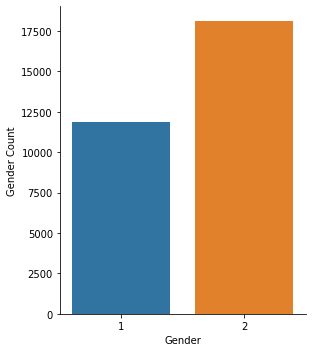

In [18]:
fg = sns.catplot('Gender', data=df, kind='count', aspect=.85)
fg.set_xlabels('Gender')
fg.set_ylabels('Gender Count')

### Group By: Education

In [19]:
# group descripcion by education 
# (1 = graduate school; 2 = university; 3 = high school; 
# 4 = others, 5 = Not defined, 6 = Not defined)
df.groupby('Education')['Education'].count()

Education
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: Education, dtype: int64

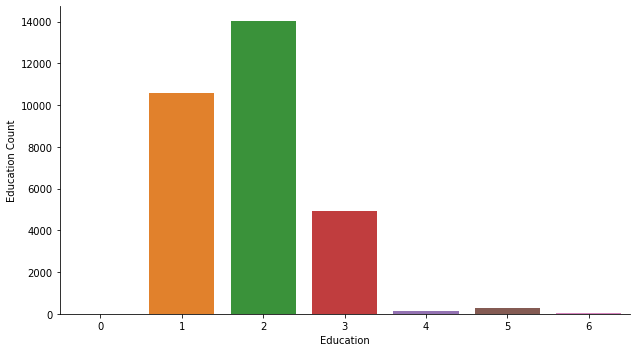

In [20]:
fg = sns.catplot('Education', data=df, kind='count', aspect=1.75)
fg.set_xlabels('Education')
fg.set_ylabels('Education Count')

**Note**. We observe that the data presents non-consistent groupings. Group '0' does not exist in the documentation and groups '5' and '6' are classified as 'not defined'. Possibly the best approach is to regroup these into more representative ones, otherwise we would have groups that do not add 'significance' in an eventual modeling through Machine Learning.

### Group by: Marital Status

In [21]:
# group descripcion by marital status
# (0 = Not defined, 1 = married; 2 = single; 3 = others).
df.groupby('MaritalStatus')['MaritalStatus'].count()

MaritalStatus
0       54
1    13659
2    15964
3      323
Name: MaritalStatus, dtype: int64

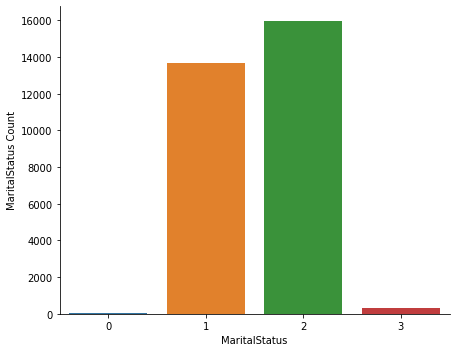

In [22]:
fg = sns.catplot('MaritalStatus', data=df, kind='count', aspect=1.25)
fg.set_xlabels('MaritalStatus')
fg.set_ylabels('MaritalStatus Count')

Note. We can observe that the group '0' does not provide a significant reference, as does the group '3', being necessary to evaluate its conjunction during the range adjustment phase.

### Group by: Gender + Education

In [23]:
# Educational distribution by gender
df.groupby(['Gender','Education'])['Gender'].count()

Gender  Education
1       0               8
        1            4354
        2            5374
        3            1990
        4              42
        5              95
        6              25
2       0               6
        1            6231
        2            8656
        3            2927
        4              81
        5             185
        6              26
Name: Gender, dtype: int64

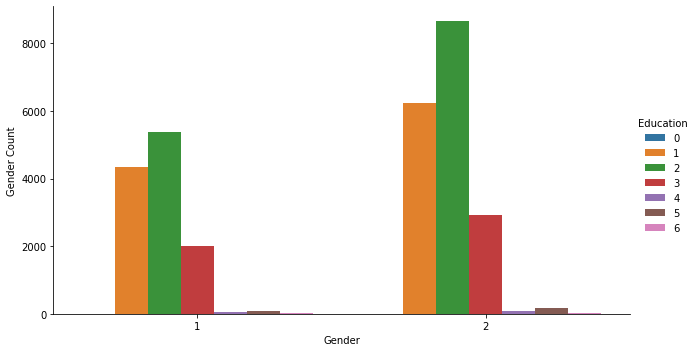

In [24]:
# instead of use group by will use seaborn
g = sns.catplot('Gender', data=df, hue='Education', kind='count', aspect=1.75)
g.set_xlabels('Gender')
g.set_ylabels('Gender Count')

### Group by: Gender + Marital Status

In [25]:
# Educational distribution by gender
df.groupby(['Gender','MaritalStatus'])['Gender'].count()

Gender  MaritalStatus
1       0                  14
        1                5190
        2                6553
        3                 131
2       0                  40
        1                8469
        2                9411
        3                 192
Name: Gender, dtype: int64

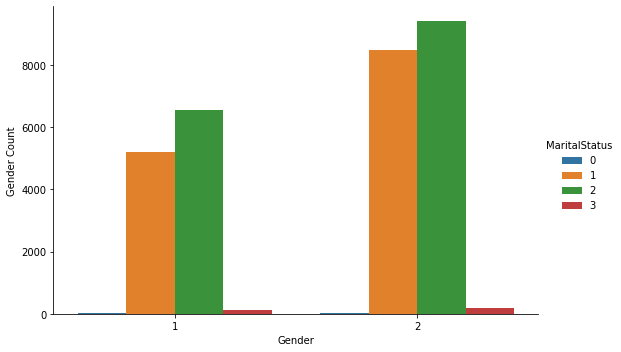

In [26]:
# instead of use group by will use seaborn
g = sns.catplot('Gender', data=df, hue='MaritalStatus', kind='count', aspect=1.5)
g.set_xlabels('Gender')
g.set_ylabels('Gender Count')

#### Data visualizations

##### Univariate plots

In this section we will look at three techniques that will provide us with joint visualization and understanding for each attribute of the data set.

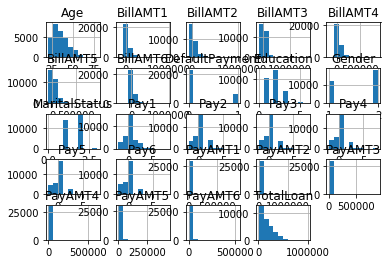

In [27]:
# Histograms
dfh = df.iloc[:,1:]
dfh.hist()
plt.show()

We can not see `Gaussian` or `nearly Gaussian` distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.
As We previously sugested, classifications like: Gender and Default Payment show a binary distribution

The set of BuillAMT(n) attributes show an exponential distribution, as well as our dependent variable '**Total Loand**'.

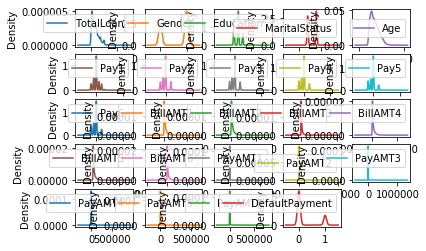

In [28]:
# Density Plots
dfdp = df.iloc[:,1:]
dfdp.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.show()

It is possible to observe that the distributions for Pay (n), BillAMT (n) and PayAMT (n) in each of their groups are very similar.

In [46]:
# Box and Whisker Plots

#plt.figure(figsize=(10, 10))
#df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
#plt.show()

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

<Figure size 648x576 with 0 Axes>

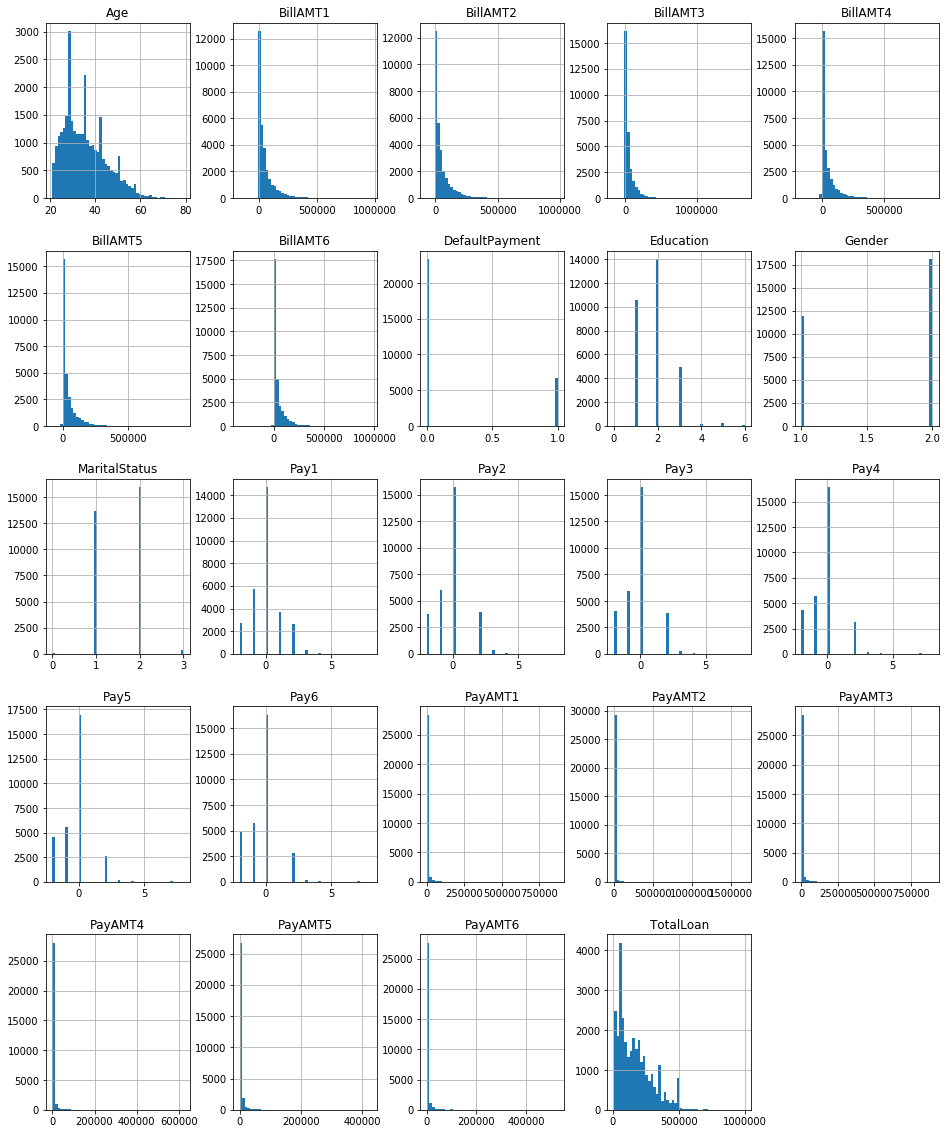

In [30]:
# plot all columns
dfpc = df.iloc[:,1:]
plt.figure(figsize=(9, 8))
sns.distplot(dfpc.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10));

##### Multivariate plots

This section provides examples of two plots that show the interactions between multiple variables in the dataset.
- Correlation Matrix Plot.
- Scatter Plot Matrix.

In [ ]:
# Correlation Matrix Plot

In [99]:
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
corr1 = dfhm.drop('DefaultPayment', axis=1).corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(0)

,TotalLoan,Gender,Education,MaritalStatus,Age,Pay0,Pay2,Pay3,Pay4,Pay5,Pay6,BillAMT1,BillAMT2,BillAMT3,BillAMT4,BillAMT5,BillAMT6,PayAMT1,PayAMT2,PayAMT3,PayAMT4,PayAMT5,PayAMT6
TotalLoan,1,0.02,-0.2,-0.1,0.1,-0.3,-0.3,-0.3,-0.3,-0.2,-0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2
Gender,0.02,1,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.0002,-0.001,-0.009,-0.002,-0.002,-0.003
Education,-0.2,0.01,1,-0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.08,0.02,0.02,0.01,-0.0005,-0.008,-0.009,-0.04,-0.03,-0.04,-0.04,-0.04,-0.04
MaritalStatus,-0.1,-0.03,-0.1,1,-0.4,0.02,0.02,0.03,0.03,0.04,0.03,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.006,-0.008,-0.004,-0.01,-0.001,-0.007
Age,0.1,-0.09,0.2,-0.4,1,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02
Pay0,-0.3,-0.06,0.1,0.02,-0.04,1,0.7,0.6,0.5,0.5,0.5,0.2,0.2,0.2,0.2,0.2,0.2,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06
Pay2,-0.3,-0.07,0.1,0.02,-0.05,0.7,1,0.8,0.7,0.6,0.6,0.2,0.2,0.2,0.2,0.2,0.2,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04
Pay3,-0.3,-0.07,0.1,0.03,-0.05,0.6,0.8,1,0.8,0.7,0.6,0.2,0.2,0.2,0.2,0.2,0.2,0.001,-0.07,-0.05,-0.05,-0.04,-0.04
Pay4,-0.3,-0.06,0.1,0.03,-0.05,0.5,0.7,0.8,1,0.8,0.7,0.2,0.2,0.2,0.2,0.2,0.2,-0.009,-0.002,-0.07,-0.04,-0.03,-0.03
Pay5,-0.2,-0.06,0.1,0.04,-0.05,0.5,0.6,0.7,0.8,1,0.8,0.2,0.2,0.2,0.3,0.3,0.3,-0.006,-0.003,0.009,-0.06,-0.03,-0.02


In [ ]:
# Scatter Plot Matrix.

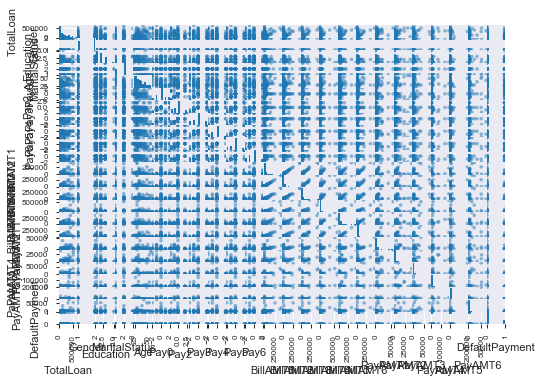

In [98]:
dfspl = df.iloc[:,1:]
scatter_matrix(dfspl)
plt.show()

##### Feature to Feature Relationships

In [24]:
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
# correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

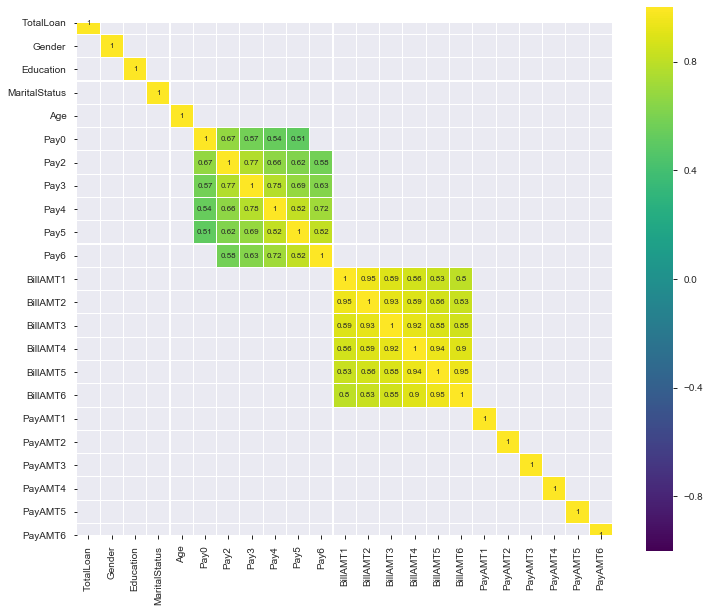

In [97]:
# Heatmap
dfhm = df.iloc[:,1:]
corr = dfhm.drop('DefaultPayment', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
# plt.savefig('heatmap.png')

### Individual Exploratory

#### Relevante Distributions

count      30000.000
mean      167484.323
std       129747.662
min        10000.000
25%        50000.000
50%       140000.000
75%       240000.000
max      1000000.000
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

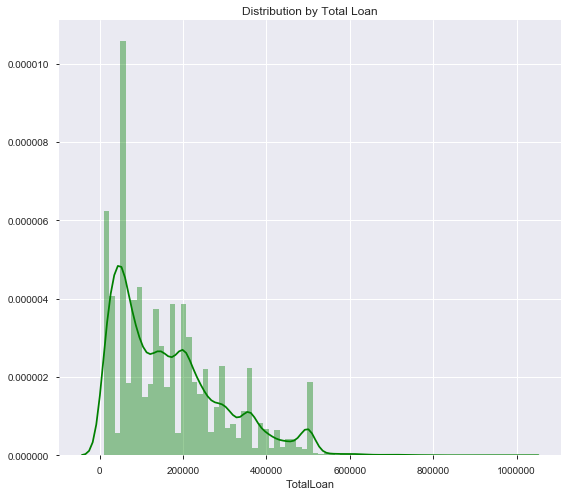

In [84]:
# Total loan Distribution
print(df['TotalLoan'].describe())
plt.figure(figsize=(9, 8))
tl_dist = sns.distplot(df['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")
# plt.savefig('file-name.png')

From the previous image, we can see that there is a set of '**outliers**'. Before the model phase we must remove them.

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Distribution by Ages')

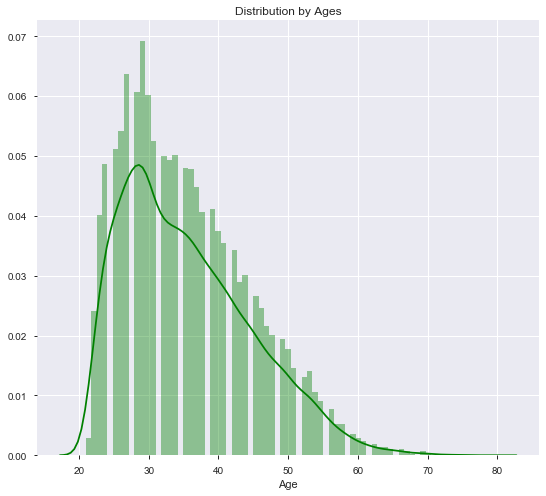

In [82]:
# Age Distribution
print(df.Age.describe())
plt.figure(figsize=(9, 8))
age_dist = sns.distplot(df.Age, color='g', bins=75, hist_kws={'alpha': 0.4});
age_dist.set_title("Distribution by Ages")
# plt.savefig('file-name.png')

## Dealing with Outliers

In this section we will demonstrate the behavior of the variables 'TotalLoan' and 'Age' after handling outliers

In [110]:
# Function to demonstrate the result of working with outliers
def find_anomalies(data):
    data_std = data.std()
    data_mean = data.mean()
    
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    print(lower_limit)
    print(upper_limit)

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

### Dealing with TotalLoan outliers

In [131]:
dfloan = df.iloc[:,:]
anoma_loan = []

anoma_loan = find_anomalies(dfloan.set_index('Id')[['TotalLoan']])
anoma_loan

TotalLoan   -92011.0
dtype: float64
TotalLoan    426979.646
dtype: float64


[5,
 34,
 35,
 66,
 67,
 103,
 130,
 150,
 154,
 160,
 176,
 247,
 273,
 309,
 329,
 355,
 366,
 367,
 374,
 376,
 388,
 435,
 465,
 466,
 516,
 553,
 574,
 602,
 618,
 635,
 680,
 735,
 756,
 829,
 838,
 850,
 884,
 885,
 897,
 932,
 948,
 980,
 990,
 1018,
 1021,
 1030,
 1038,
 1059,
 1063,
 1065,
 1071,
 1074,
 1109,
 1115,
 1119,
 1168,
 1172,
 1183,
 1195,
 1217,
 1236,
 1239,
 1271,
 1277,
 1377,
 1379,
 1412,
 1439,
 1453,
 1504,
 1506,
 1564,
 1584,
 1626,
 1645,
 1661,
 1686,
 1692,
 1712,
 1727,
 1741,
 1771,
 1772,
 1786,
 1807,
 1821,
 1823,
 1856,
 1884,
 1960,
 1992,
 1993,
 1998,
 2055,
 2064,
 2078,
 2089,
 2105,
 2131,
 2135,
 2147,
 2160,
 2161,
 2180,
 2184,
 2188,
 2219,
 2222,
 2274,
 2282,
 2291,
 2313,
 2320,
 2357,
 2367,
 2427,
 2443,
 2445,
 2450,
 2465,
 2569,
 2570,
 2602,
 2626,
 2632,
 2676,
 2739,
 2745,
 2778,
 2822,
 2824,
 2828,
 2834,
 2988,
 3020,
 3034,
 3055,
 3133,
 3182,
 3215,
 3227,
 3233,
 3243,
 3258,
 3265,
 3276,
 3333,
 3408,
 3419,
 3432,

In [132]:
dfloan.drop(anoma_loan, inplace=True)

print(dfloan.TotalLoan.describe())

count      27014.000
mean      166714.284
std       129172.930
min        10000.000
25%        50000.000
50%       140000.000
75%       240000.000
max      1000000.000
Name: TotalLoan, dtype: float64


count      27014.000
mean      166714.284
std       129172.930
min        10000.000
25%        50000.000
50%       140000.000
75%       240000.000
max      1000000.000
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

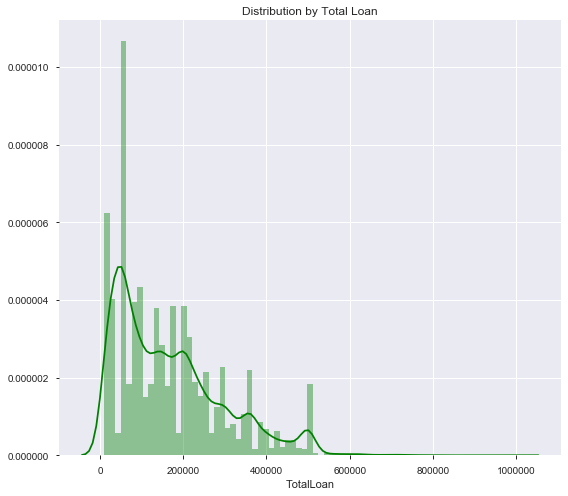

In [133]:
# Total loan Distribution
print(dfloan['TotalLoan'].describe())
plt.figure(figsize=(9, 8))
tl_dist = sns.distplot(dfloan['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")
# plt.savefig('file-name.png')

### Dealing with Age outliers

In [138]:
dfage = df.iloc[:,:]
anomal_age = []

anomal_age = find_anomalies(dfage.set_index('Id')[['Age']])
anomal_age

Age    17.05
dtype: float64
Age    53.921
dtype: float64


[5,
 34,
 35,
 66,
 67,
 103,
 130,
 150,
 154,
 160,
 176,
 247,
 273,
 309,
 329,
 355,
 366,
 367,
 374,
 376,
 388,
 435,
 465,
 466,
 516,
 553,
 574,
 602,
 618,
 635,
 680,
 735,
 756,
 829,
 838,
 850,
 884,
 885,
 897,
 932,
 948,
 980,
 990,
 1018,
 1021,
 1030,
 1038,
 1059,
 1063,
 1065,
 1071,
 1074,
 1109,
 1115,
 1119,
 1168,
 1172,
 1183,
 1195,
 1217,
 1236,
 1239,
 1271,
 1277,
 1377,
 1379,
 1412,
 1439,
 1453,
 1504,
 1506,
 1564,
 1584,
 1626,
 1645,
 1661,
 1686,
 1692,
 1712,
 1727,
 1741,
 1771,
 1772,
 1786,
 1807,
 1821,
 1823,
 1856,
 1884,
 1960,
 1992,
 1993,
 1998,
 2055,
 2064,
 2078,
 2089,
 2105,
 2131,
 2135,
 2147,
 2160,
 2161,
 2180,
 2184,
 2188,
 2219,
 2222,
 2274,
 2282,
 2291,
 2313,
 2320,
 2357,
 2367,
 2427,
 2443,
 2445,
 2450,
 2465,
 2569,
 2570,
 2602,
 2626,
 2632,
 2676,
 2739,
 2745,
 2778,
 2822,
 2824,
 2828,
 2834,
 2988,
 3020,
 3034,
 3055,
 3133,
 3182,
 3215,
 3227,
 3233,
 3243,
 3258,
 3265,
 3276,
 3333,
 3408,
 3419,
 3432,

In [139]:
dfage.drop(anomal_age, inplace=True)

print(dfage.Age.describe())

count    27014.000
mean        34.938
std          8.766
min         21.000
25%         28.000
50%         33.000
75%         41.000
max         75.000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Distribution by Ages')

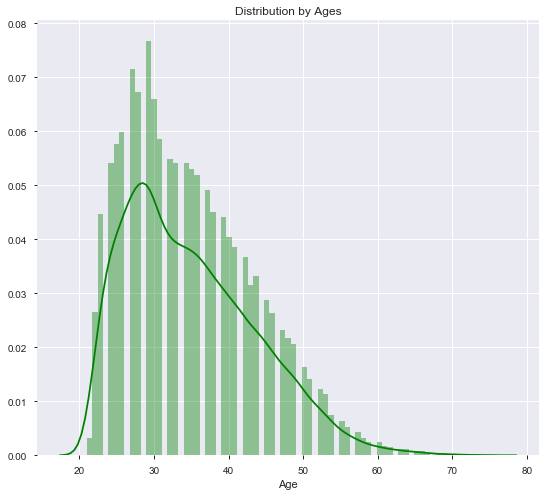

In [140]:
plt.figure(figsize=(9, 8))
age_dist2 = sns.distplot(dfage.Age, color='g', bins=75, hist_kws={'alpha': 0.4});
age_dist2.set_title("Distribution by Ages")

After an experiment with outliers for the attributes 'TotalLoan' and 'Age', we find that the set of observations are reduced by 2986 and 2986 respectively.